**Цель работы:**

Изучение алгоритмов и методов кластеризации на практике.

1. Часть 1.

1.1. Использовать функцию для создания набора данных. 

In [1]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
    [6, 9],
    [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

1.2. В результате применения получается  DataFrame , содержащий заданное число объектов
в каждой группе (всего 3 группы) с двумя признаками:  'x'  и  'y' .

In [2]:
df1 = make_data(40, 15)
df1.head()

,x,y
19,60.297602,1.840797
37,50.194948,1.798293
6,38.082759,1.108696
81,179.355590,1.188474
94,173.501200,1.940466


1.3. Провести стандартизацию данных. 


In [3]:
from sklearn.preprocessing import StandardScaler
X = df1[['x','y']] 
scaler = StandardScaler() # создание объекта класса Scaler
X_scaled = scaler.fit_transform(X)# стандартизированные данные для кластеризации
df1= pd.DataFrame(X_scaled, columns=['x','y'])

1.4.  С помощью метода  .fit_predict  обучить модель для кластеризации методом Kmeans для
трёх кластеров. Выполнить предсказание. Получить метки кластеров.


In [4]:
from sklearn.cluster import KMeans
X = X_scaled
k_means = KMeans(n_clusters = 3, random_state = 0) 
k_means = k_means.fit(X) # обучение
clusters = k_means.predict(X) # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров


c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1.5. Провести визуализацию кластеров с помощью scatter . Построить графики. Пометить
на графике центры кластеров. Покрасить объекты из разных кластеров разными
цветами.

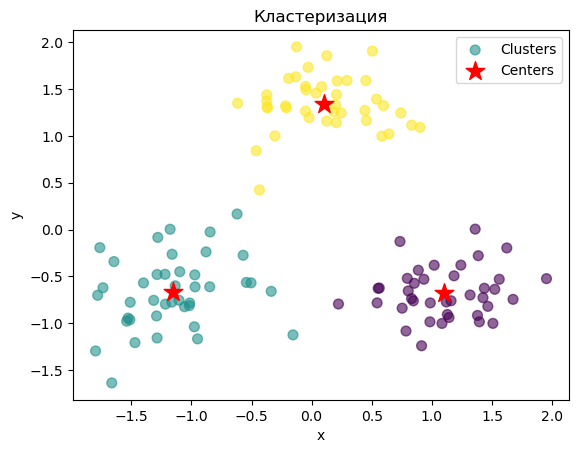

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df1['x'], df1['y'], c=clusters, cmap='viridis', s=50, alpha=0.6, label='Clusters')
centers = k_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='*', label='Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация')
plt.legend()
plt.show()

1.6.  Посчитать коэффициент силуэта

In [6]:
from sklearn.metrics import silhouette_score
silhouette_score(df1, clusters)

np.float64(0.7034414657035233)

1.7. Повторить пункты 4-6 для n_clusters = 2 и n_clusters = 4 . Сравнить результаты и сделать
выводы.

1.7.1. для n_clusters = 2

c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


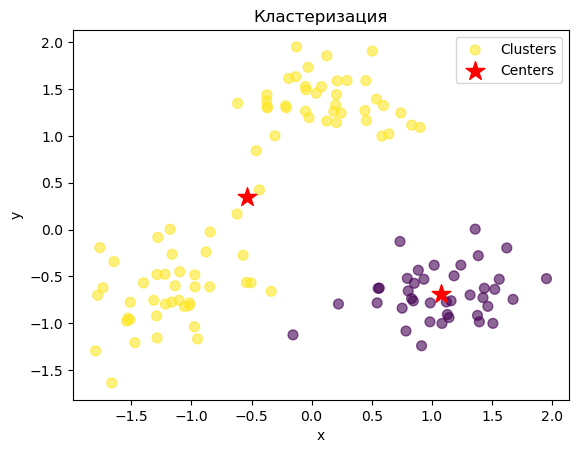

np.float64(0.45886268416006504)

In [7]:
k_means1 = KMeans(n_clusters = 2, random_state = 0) 
k_means1 = k_means1.fit(X) # обучение
clusters1 = k_means1.predict(X) # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров
plt.scatter(df1['x'], df1['y'], c=clusters1, cmap='viridis', s=50, alpha=0.6, label='Clusters')
centers1 = k_means1.cluster_centers_
plt.scatter(centers1[:,0], centers1[:,1], c='red', s=200, marker='*', label='Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация')
plt.legend()
plt.show()
silhouette_score(df1, clusters1)

1.7.2. для n_clusters = 4

c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


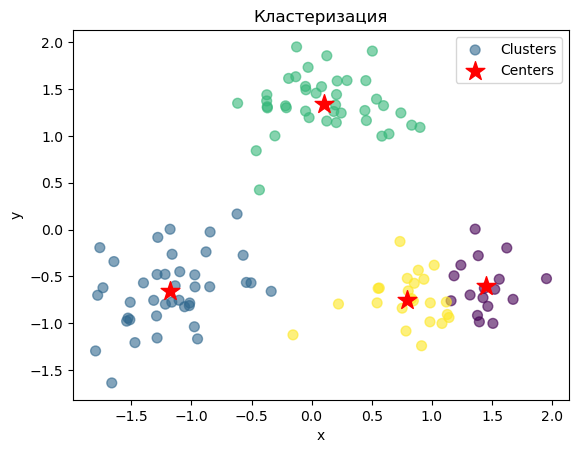

np.float64(0.5780147971755888)

In [8]:
k_means2 = KMeans(n_clusters = 4, random_state = 0) 
k_means2 = k_means2.fit(X) # обучение
clusters2 = k_means2.predict(X) # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров
plt.scatter(df1['x'], df1['y'], c=clusters2, cmap='viridis', s=50, alpha=0.6, label='Clusters')
centers2 = k_means2.cluster_centers_
plt.scatter(centers2[:,0], centers2[:,1], c='red', s=200, marker='*', label='Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация')
plt.legend()
plt.show()
silhouette_score(df1, clusters2)

1.8. График метод локтя.

c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

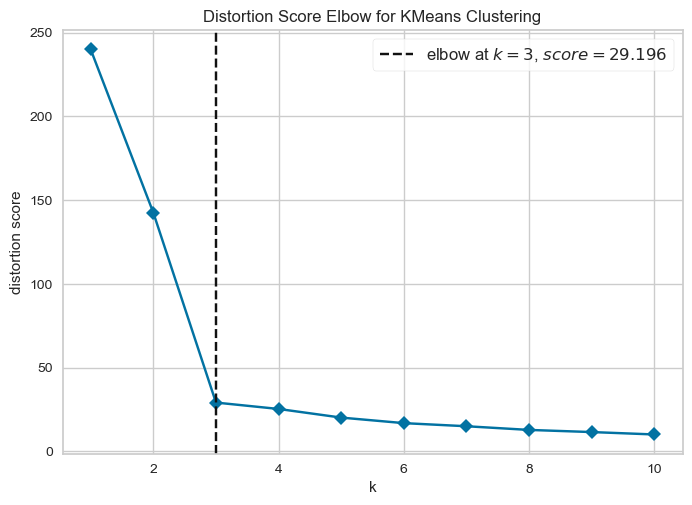

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(X)
visualizer.show()


Исходя из визуализации можно увидеть, что лучше всего брать 3 кластера для кластеризации, что доказывается коэффициентом Силуэтом для разных количеств кластеров. Таким образом, для n_clasters=3 коэффициент равен 0.703, для n_clasters=2 коэффициент равен 0.458, а для n_clasters=4 коэффициент равен 0.578.

2. Часть 2. Выполнение класторизации по вариантам.

2.1. Загрузка набора данных.

In [10]:
path = 'C:/Users/Алиса/Desktop/ГУАП/3 курс/1 семестр/Введение в анализ данных/Лабораторная работа №4/employee_attrition.csv'
df = pd.read_csv(path, sep=',')
df.head(5)

,age,gender,department,job_level,marital_status,monthly_income,years_at_company,overtime,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
0,31,F,Engineering,1,Single,5163.0,14,No,3,24.1,141.0,0
1,29,M,Sales,2,Divorced,13878.0,1,No,3,4.6,141.0,0
2,26,F,Support,1,Married,4712.0,6,No,3,8.4,148.0,0
3,61,F,Engineering,2,Single,12196.0,12,Yes,4,2.2,98.0,0
4,59,F,Sales,5,Single,15823.0,18,No,4,7.2,10.0,0


2.2. Проведение первичной обработки данных.

2.2.1 Проведение первичного описания датасета.

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3048 non-null   int64  
 1   gender                    3048 non-null   object 
 2   department                3048 non-null   object 
 3   job_level                 3048 non-null   int64  
 4   marital_status            3048 non-null   object 
 5   monthly_income            3048 non-null   float64
 6   years_at_company          3048 non-null   int64  
 7   overtime                  3048 non-null   object 
 8   performance_rating        3048 non-null   int64  
 9   distance_from_home_km     3048 non-null   float64
 10  training_hours_last_year  3048 non-null   float64
 11  Attrition                 3048 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 285.9+ KB


,age,job_level,monthly_income,years_at_company,performance_rating,distance_from_home_km,training_hours_last_year,Attrition
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,41.308071,2.188976,7727.857283,20.102362,2.838583,10.236490,104.930118,0.091207
std,13.431709,1.165800,4058.833918,11.826501,0.733775,9.208483,76.474385,0.287951
min,18.000000,1.000000,1488.000000,0.000000,1.000000,-1.900000,0.000000,0.000000
25%,30.000000,1.000000,4901.750000,10.000000,2.000000,4.100000,50.000000,0.000000
50%,42.000000,2.000000,6733.000000,20.000000,3.000000,8.200000,102.000000,0.000000
75%,53.000000,3.000000,9529.500000,30.000000,3.000000,14.100000,151.000000,0.000000
max,64.000000,5.000000,35395.000000,40.000000,4.000000,99.840000,735.000000,1.000000


2.2.2. Замена у столбца 'distance_from_home_km' отрицательных значений на положительные.

In [12]:
df['distance_from_home_km'] = df['distance_from_home_km'].abs()

2.2.3. Проверка наличия пропусков, а также названия столбцов

In [13]:
for column in df.columns:
    print(f'{column} : {df[column].isna().sum()}')

age : 0
gender : 0
department : 0
job_level : 0
marital_status : 0
monthly_income : 0
years_at_company : 0
overtime : 0
performance_rating : 0
distance_from_home_km : 0
training_hours_last_year : 0
Attrition : 0


2.2.4. Проверка на наличие явных и неявных дубликатов.

In [14]:
df[df.duplicated()] # получение дубликатов с помощью логической индексации
print(df.duplicated().sum())

0


In [15]:
for column in df.columns:
    if column in ['gender', 'department' , 'marital_status', 'overtime']:
        df[column] = df[column].str.upper()
        print(f'{column}: {df[column].unique()}')

gender: ['F' 'M']
department: ['ENGINEERING' 'SALES' 'SUPPORT' 'FINANCE' 'HR']
marital_status: ['SINGLE' 'DIVORCED' 'MARRIED']
overtime: ['NO' 'YES']


2.3.  Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной разными цветами.


Выделенная целевая переменная - Attrition.

In [16]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

Матрица диаграмм рассеяния.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='job_level', ylabel='age'>,
        <Axes: xlabel='monthly_income', ylabel='age'>,
        <Axes: xlabel='years_at_company', ylabel='age'>,
        <Axes: xlabel='performance_rating', ylabel='age'>,
        <Axes: xlabel='distance_from_home_km', ylabel='age'>,
        <Axes: xlabel='training_hours_last_year', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='job_level'>,
        <Axes: xlabel='job_level', ylabel='job_level'>,
        <Axes: xlabel='monthly_income', ylabel='job_level'>,
        <Axes: xlabel='years_at_company', ylabel='job_level'>,
        <Axes: xlabel='performance_rating', ylabel='job_level'>,
        <Axes: xlabel='distance_from_home_km', ylabel='job_level'>,
        <Axes: xlabel='training_hours_last_year', ylabel='job_level'>],
       [<Axes: xlabel='age', ylabel='monthly_income'>,
        <Axes: xlabel='job_level', ylabel='monthly_income'>,
        <Axes: xlabel='monthly_income', ylabel='monthly_

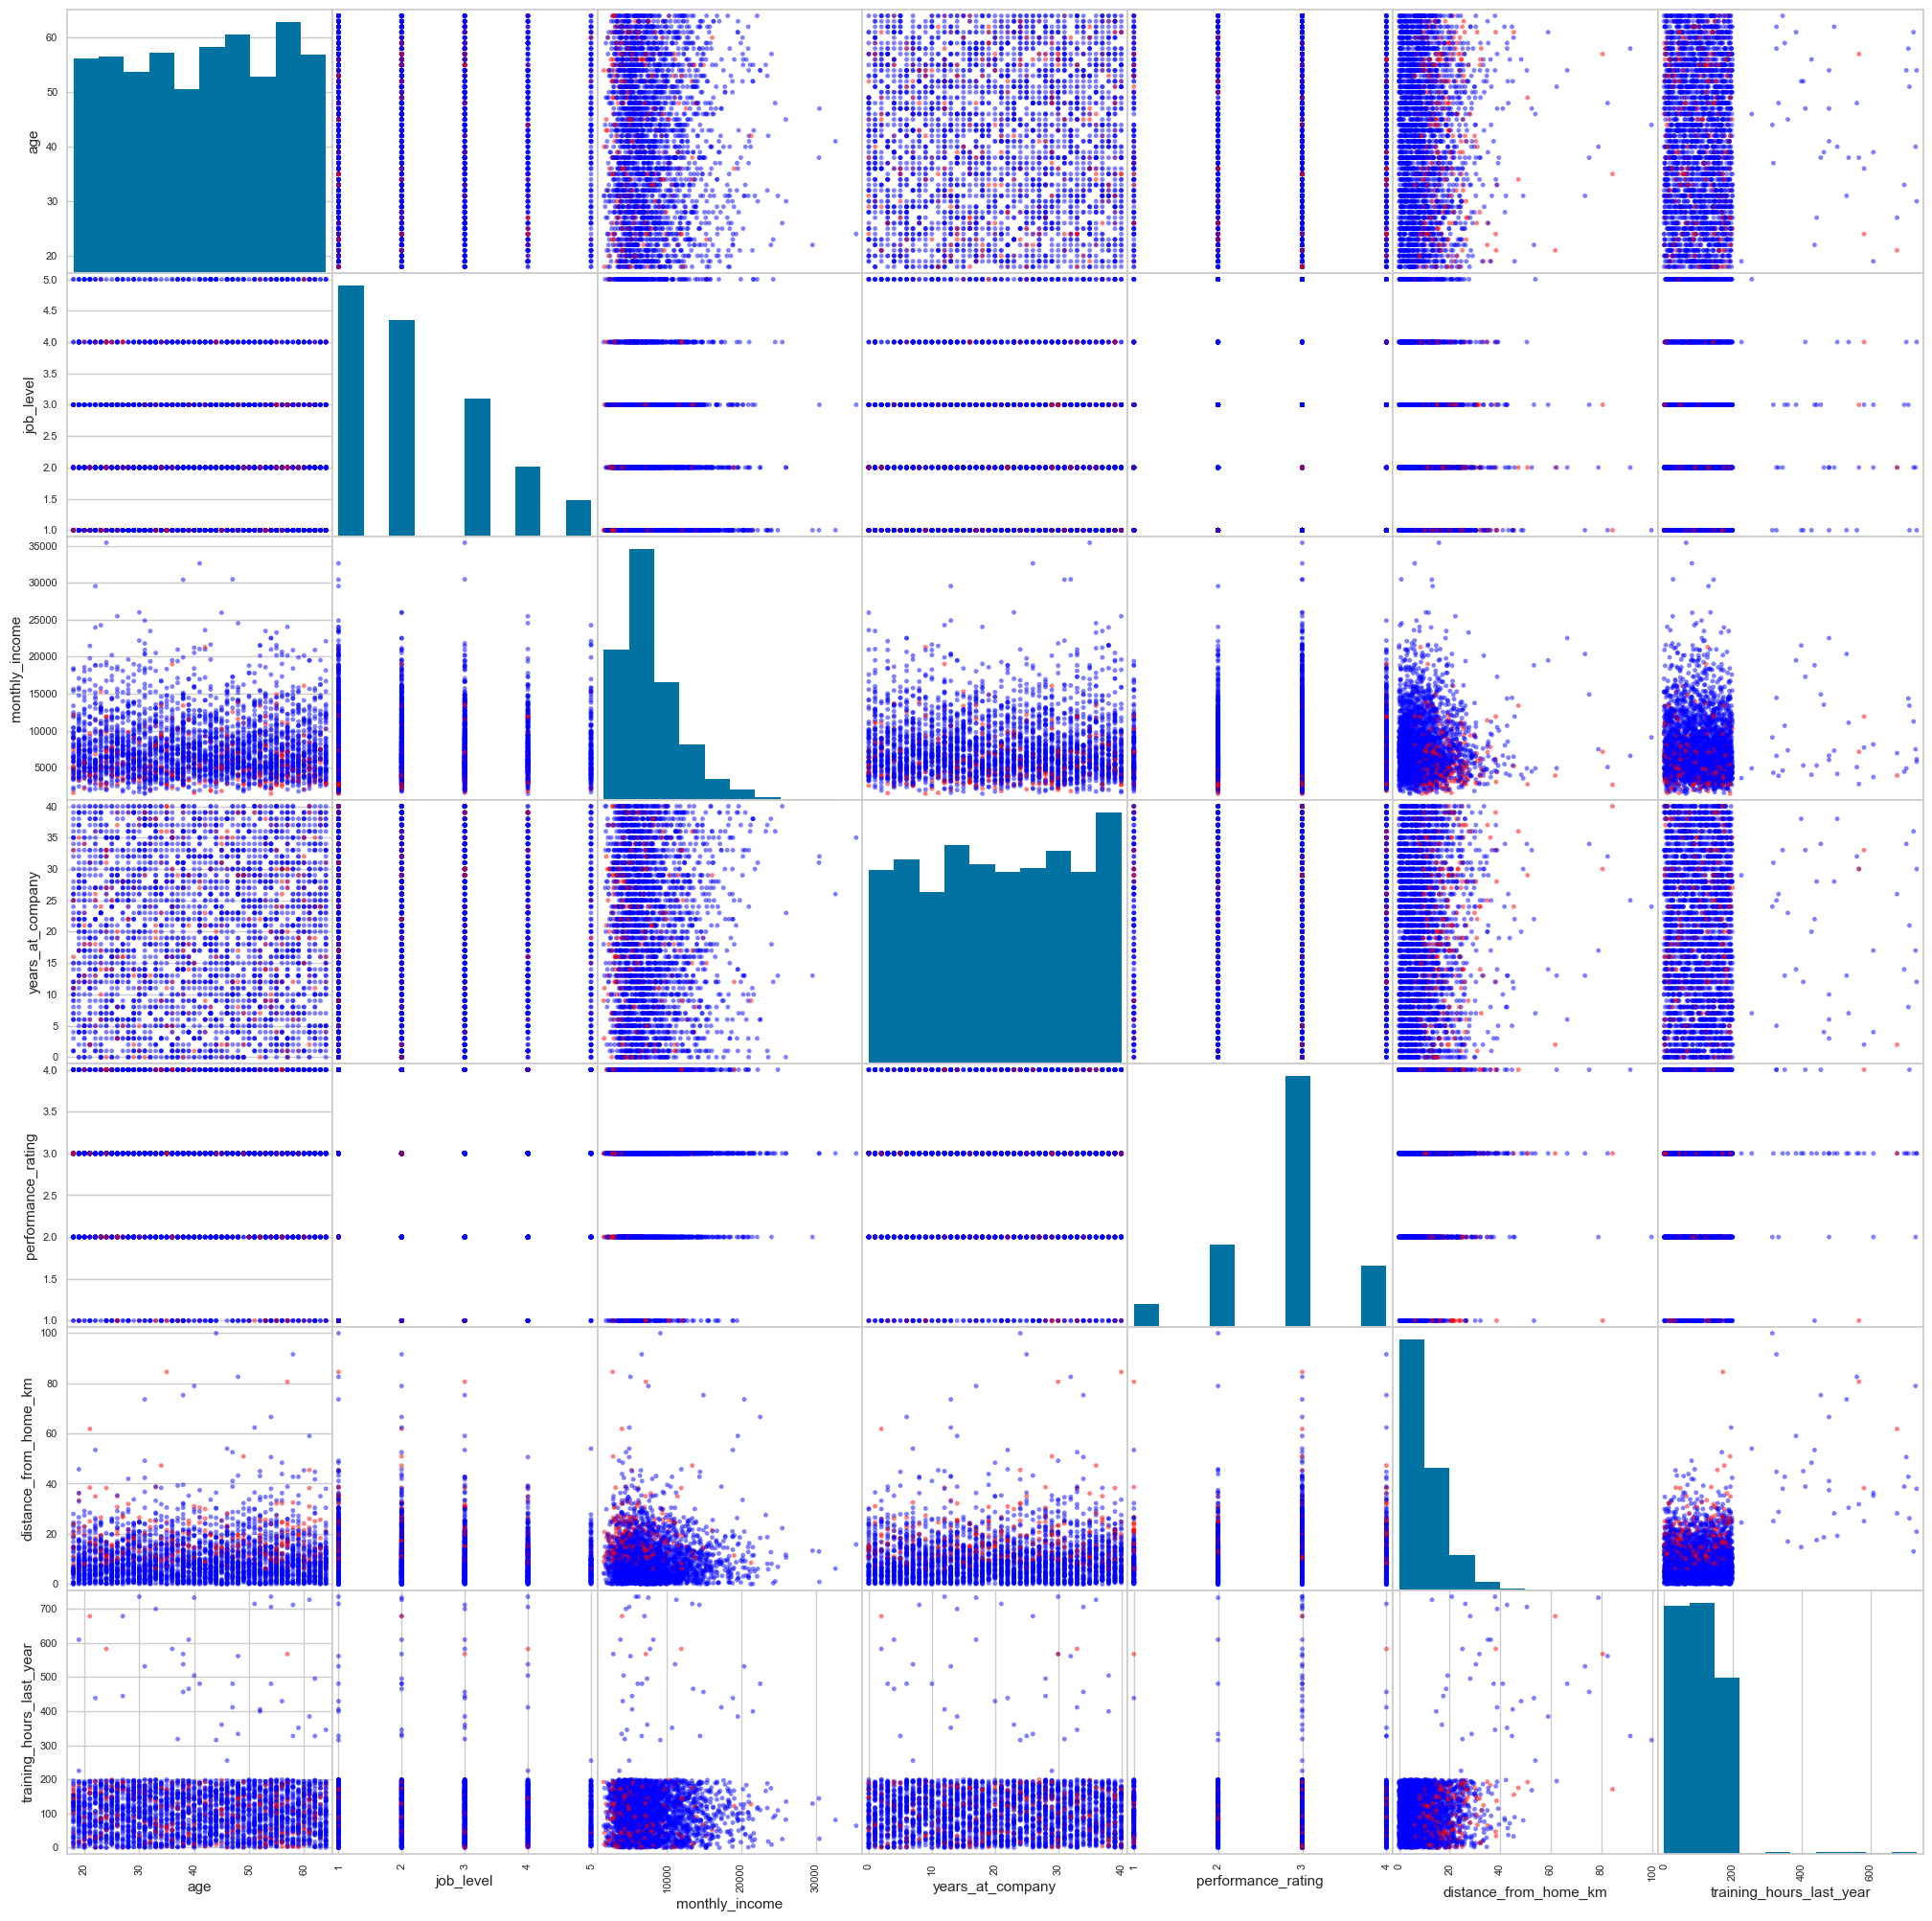

In [17]:
pd.plotting.scatter_matrix(X, figsize=(25,25), c=y, cmap='bwr')

2.4. Выполнение стандартизации числовых данных.

In [18]:
from sklearn.preprocessing import StandardScaler
num_cols = ['age','job_level','monthly_income','years_at_company','performance_rating','distance_from_home_km','training_hours_last_year']
scaler = StandardScaler() # создание объекта класса Scaler
df_copy = df.copy()
df[num_cols] = scaler.fit_transform(df[num_cols])

2.5. Выполнение кластеризации объектов методом k-means . Подобрать оптимальное количество кластеров.


In [19]:
X = df.drop(['Attrition', 'gender', 'department', 'marital_status', 'overtime'], axis=1)
k_means = KMeans(n_clusters = 3, random_state = 0) 
k_means = k_means.fit(X) # обучение
clusters = k_means.predict(X) # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров

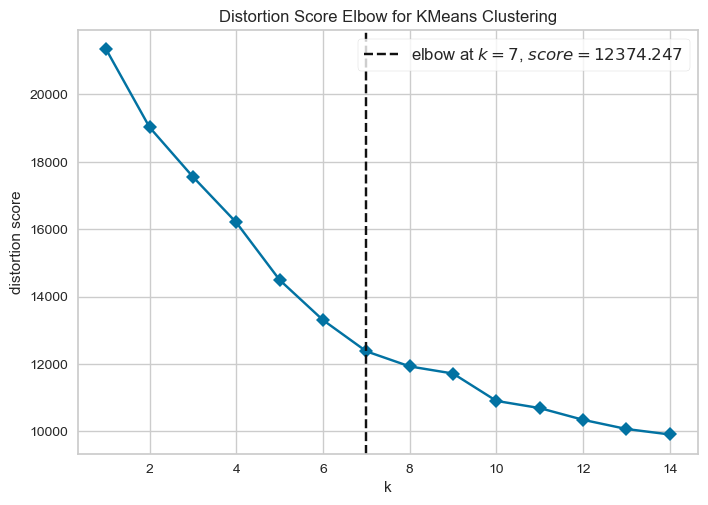

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
visualizer = KElbowVisualizer(k_means, k=(1,15), timings=False)
visualizer.fit(X)
visualizer.show()

In [21]:
k_means = KMeans(n_clusters = 7, random_state = 0) 
k_means = k_means.fit(X) # обучение
clusters = k_means.predict(X)

2.6. Определить объекты, относящиеся к одному кластеру и сделать выводы о каждом кластере. Подсчитать средние показатели по каждому признаку каждого кластера.


In [22]:
df_copy['cluster'] = clusters
cluster_summary = df_copy.groupby('cluster')[num_cols + ['Attrition']].mean()
print(cluster_summary)

               age  job_level  monthly_income  years_at_company  \
cluster                                                           
0        40.646444   4.152720     7161.359833         19.728033   
1        40.605932   1.976695     6565.122881         22.913136   
2        26.312195   1.687805     6650.793496         16.481301   
3        39.758514   1.984520    16062.513932         20.801858   
4        44.000000   2.369565     8616.108696         20.826087   
5        48.755594   1.760757     6334.867470         31.703959   
6        52.414634   1.769231     6899.272045          8.994371   

         performance_rating  distance_from_home_km  training_hours_last_year  \
cluster                                                                        
0                  2.979079               9.491632                 99.830544   
1                  1.663136               9.937076                 98.883475   
2                  3.084553               9.179837                101.001626

В результате кластеризации были выделены 7 групп сотрудников, различающиеся по возрасту, стажу, уровню дохода и риску увольнения. Наиболее вероятно не уволившимися оказались кластеры 0 и 3, где сотрудники имеют высокий уровень дохода или длительный опыт работы. Группами с высокой текучестью кадров являются кластеры 1 и 4: в первом кластере низкая производительность, во втором же очень большое расстояние от дома до работы и высокая нагрузка по обучению. Остальные же кластеры 2, 5, 6 демонстрируют умеренный уровень риска увольнения сотрудника.

2.7. Метрики

In [23]:
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

In [24]:
print('Коэффициент силуэта:', silhouette_score(X, clusters))
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, clusters))
print("AMI (Adjusted Mutual Information):", adjusted_mutual_info_score(y, clusters))
print("Индекс Фаулкса-Мэллоуса FMI:", fowlkes_mallows_score(y, clusters))
print("Homogenity (однородность):", homogeneity_score(y, clusters))
print("Completeness (полнота):", completeness_score(y, clusters))
print("V-мера:", v_measure_score(y, clusters))

Коэффициент силуэта: 0.1266633897115881
ARI (Adjusted Rand Index): -0.0011658101589211763
AMI (Adjusted Mutual Information): 0.0037890747997665988
Индекс Фаулкса-Мэллоуса FMI: 0.3725397064345374
Homogenity (однородность): 0.01646959152452678
Completeness (полнота): 0.002756325690738705
V-мера: 0.004722329522877719


Внутреннее качество кластеризации низкое
(Коэффициент силуэта = 0.126), что говорит о слабой отделённости и размытости кластеров.
Соответствие кластеров реальным меткам практически отсутствует, так как все внешние метрики (ARI, AMI, homogeneity, completeness, V-мера) принимают значения, близкие к нулю.
Модель KMeans не выделяет группы определенно группы, а распределяет сотрудников почти случайно.

2.8. выполнить кластеризацию иерархическим
агломеративным методом. Построить дендрограмму. Сделать выводы об
оптимальном количестве кластеров. Подсчитать средние показатели по каждому
признаку каждого кластера. Вычислить несколько метрик качества.


In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
pred = model.fit_predict(X)
print(model.labels_ )


[0 0 0 ... 2 2 2]


In [26]:
print('Коэффициент силуэта:', silhouette_score(X, pred))
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, pred))
print("AMI (Adjusted Mutual Information):", adjusted_mutual_info_score(y, pred))
print("Индекс Фаулкса-Мэллоуса FMI:", fowlkes_mallows_score(y, pred))
print("Homogenity (однородность):", homogeneity_score(y, pred))
print("Completeness (полнота):", completeness_score(y, pred))
print("V-мера:", v_measure_score(y, pred))

Коэффициент силуэта: 0.11818757522099234
ARI (Adjusted Rand Index): 0.029304040014986505
AMI (Adjusted Mutual Information): 0.0020013131810066734
Индекс Фаулкса-Мэллоуса FMI: 0.7477262479258036
Homogenity (однородность): 0.003984722156738196
Completeness (полнота): 0.002128611674731725
V-мера: 0.002774893809898703


Выделили три группы сотрудников, но они слабо разделены так как коэффициент Силуэта равен 0.118. FMI = 0.75 , что означает, что внутри кластеров точки сгруппированы относительно плотно.
Наиболее стабильная информация о текучести не выделяется, поэтому кластеры не позволяют прогнозировать уход сотрудников.

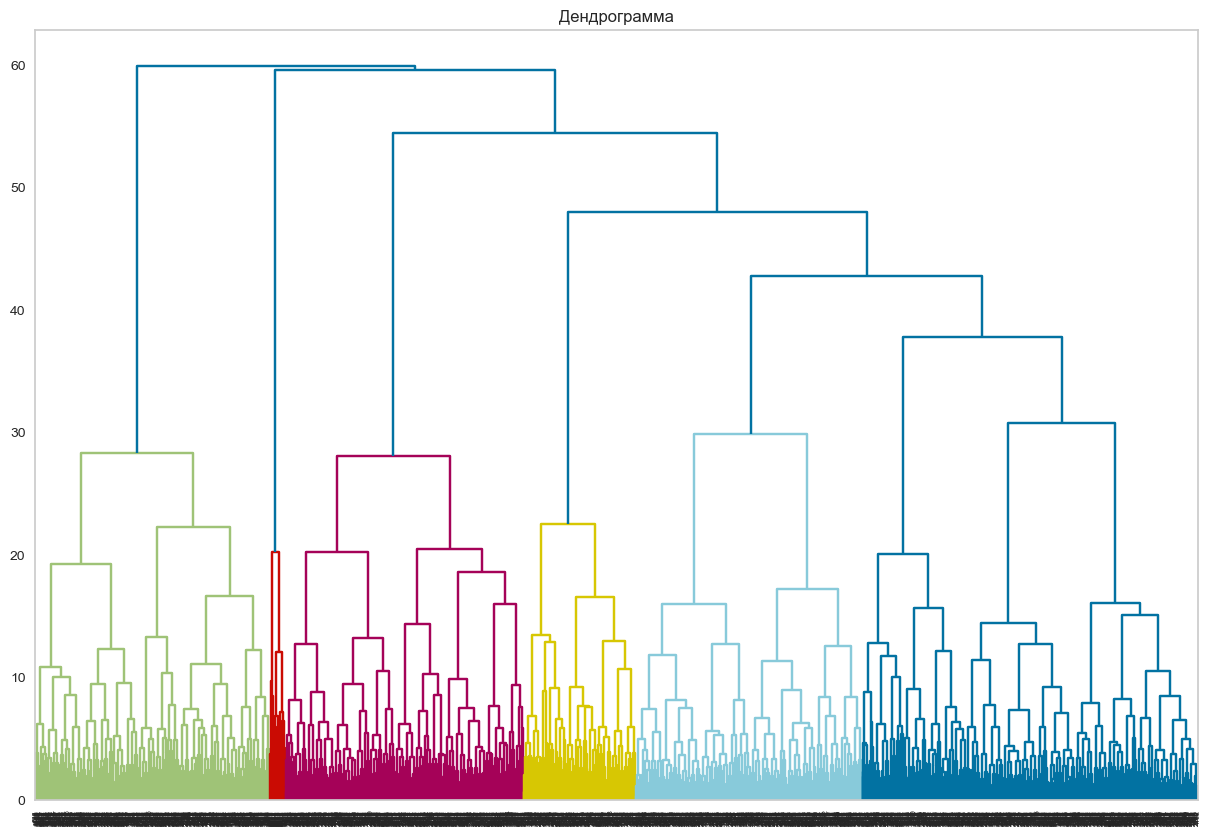

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# импорт классов модули кластеризации linkage() и dendrogram()
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')# таблица «связок» между объектами
# Визуализация дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False) #выключение сетки на графике
plt.title('Дендрограмма')
plt.show()
plt.show()

Определение оптимального количества кластеров.

In [28]:
model1 = AgglomerativeClustering(n_clusters=6)
model1.fit(X)
pred1 = model1.fit_predict(X)
print(model1.labels_ )
print('Коэффициент силуэта:', silhouette_score(X, pred1))
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, pred1))
print("AMI (Adjusted Mutual Information):", adjusted_mutual_info_score(y, pred1))
print("Индекс Фаулкса-Мэллоуса FMI:", fowlkes_mallows_score(y, pred1))
print("Homogenity (однородность):", homogeneity_score(y, pred1))
print("Completeness (полнота):", completeness_score(y, pred1))
print("V-мера:", v_measure_score(y, pred1))

[0 4 2 ... 5 5 5]
Коэффициент силуэта: 0.08883847995817168
ARI (Adjusted Rand Index): -0.004900401980615903
AMI (Adjusted Mutual Information): 0.005294673808404397
Индекс Фаулкса-Мэллоуса FMI: 0.4176259153966187
Homogenity (однородность): 0.01931374100692875
Completeness (полнота): 0.0036656350777225775
V-мера: 0.006161797105042787


Исходя из полученных метрик можно сделать вывод, что оптимальнее всего в данном методе разделение на 3 кластера.

Средние показателя для каждого признака каждого кластера.

In [29]:
df_copy['cluster'] = pred
cluster_summary = df_copy.groupby('cluster')[num_cols + ['Attrition']].mean()
cluster_summary['size'] = df_copy.groupby('cluster').size()
print(cluster_summary)

               age  job_level  monthly_income  years_at_company  \
cluster                                                           
0        41.755751   2.219573     7945.162275         20.084483   
1        39.402597   2.060065     6804.837662         20.146104   
2        43.829268   2.341463     8923.073171         20.487805   

         performance_rating  distance_from_home_km  training_hours_last_year  \
cluster                                                                        
0                  3.118361               9.923338                 99.417817   
1                  1.745130               9.388312                 99.258117   
2                  2.951220              45.178537                511.609756   

         Attrition  size  
cluster                   
0         0.083647  2391  
1         0.120130   616  
2         0.097561    41  


Кластер 0: Самая многочисленная группа, самые стабильные сотрудники, высокая производительность, самая низкая текучесть.
Кластер 1: Молодые или менее опытные сотрудники, низкая производительность, высокая текучесть кадров, а также наименьшая зарплата.
Кластер 2: Самая маленькая группа, но с наибольшим уровнем работы, наибольшее часов обучения, большее расстояние до работы, текучесть средняя.

Оба метода плохо предсказывают уход сотрудников. KMeans и AgglomerativeClustering дают почти одинаково слабый результат. Для прогнозирования увольнения кластеризация не подходит, потому что уволившиеся и не уволившиеся сотрудники разбросаны по признакам и не формируют чёткие естественные кластеры.
Кластеризация полезна только для выделения подгрупп сотрудников по признакам, но не для прямого прогноза увольнения.
Лучший метод для использования будет - KMeans, так как коэффициент Силуэту у него чуть больше.

Обший вывод.

В результате выполнения данной лабораторной работы были изучены методы кластеризации и проведен анализ на двух наборах данных. Был создан искусственный набор данных, для которого применялись алгоритмы KMeans с разным числом кластеров. Также научились определять по графику метода локтя наиболее оптимальное количество кластеров, а также научились определять метрики работы кластеризации.
Также при выполнении второй части лабораторной работы исследовали данные о сотрудниках и текучести кадров. Также научились выполнять стандартизацию и кластеризацию методом KMeans, а также изучили и реализовали кластеризацию иерархическим агломеративным методом.
Также научились строить дендрограмму для визуалиазации кластеризации.
Сравнили два метода и определили лучший метод кластеризации для конкретного набора данных. Таким образом, KMeans и иерархическая кластеризация дают похожие плохие результаты по метрикам. Для анализа структуры данных и выявления подгрупп сотрудников лучше использовать KMeans.

3, 8, + 2 кластера и сравнить

Для второй части второго метода (иерархического метода) было реализовано разделение на 2 кластера, а также подсчет метрик.

In [30]:
model2 = AgglomerativeClustering(n_clusters=2)
model2.fit(X)
pred2 = model2.fit_predict(X)
print(model2.labels_ )
print('Коэффициент силуэта:', silhouette_score(X, pred2))
print("ARI (Adjusted Rand Index):", adjusted_rand_score(y, pred2))
print("AMI (Adjusted Mutual Information):", adjusted_mutual_info_score(y, pred2))
print("Индекс Фаулкса-Мэллоуса FMI:", fowlkes_mallows_score(y, pred2))
print("Homogenity (однородность):", homogeneity_score(y, pred2))
print("Completeness (полнота):", completeness_score(y, pred2))
print("V-мера:", v_measure_score(y, pred2))

[0 0 0 ... 0 0 0]
Коэффициент силуэта: 0.10140428494421501
ARI (Adjusted Rand Index): 0.030492542399324245
AMI (Adjusted Mutual Information): 0.0025637966578029954
Индекс Фаулкса-Мэллоуса FMI: 0.759435943905842
Homogenity (однородность): 0.003932610845558292
Completeness (полнота): 0.002385684465947126
V-мера: 0.0029697784425426702


Из данных метрик, можно сделать вывод, что коэффициент силуэта немного уступает коэффициенту силуэта, разделенному на 3 кластера. В данном случае он равен 0,10, тогда как в прошлом варианте он равен 0,11.

Задание 3. Выполнить визуализацию. Выбрать два признака, построить график scatter ,
выделить кластеры разными цветами, отметить центры кластеров. Сделать
выводы. Повторить ещё для одной пары других признаков.

Первая пара признаков - age и monthly_income

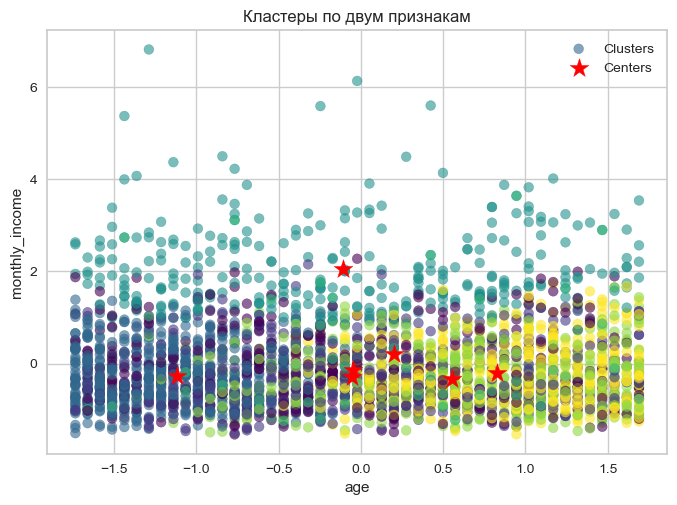

In [31]:
x_feature = 'age'
y_feature = 'monthly_income'
x_index = X.columns.get_loc(x_feature)
y_index = X.columns.get_loc(y_feature)
plt.scatter(df['age'], df['monthly_income'], c=clusters, cmap='viridis', s=50, alpha=0.6, label='Clusters')
centers = k_means.cluster_centers_
plt.scatter(centers[:,x_index], centers[:,y_index], c='red', s=200, marker='*', label='Centers')
plt.xlabel('age')
plt.ylabel('monthly_income')
plt.title('Кластеры по двум признакам')
plt.legend()
plt.show()

По признакам возраст и месячный доход кластеры разделяются преимущественно по уровню дохода. Центры кластеров расположены на разных уровнях дохода, что позволяет выделить группы сотрудников с разным доходом.

Вторая пара признаков - distance_from_home_km и performance_rating

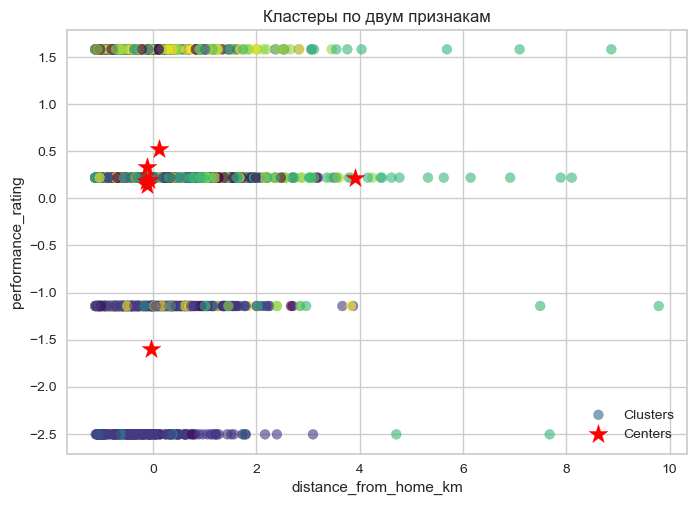

In [32]:
x_feature = 'distance_from_home_km'
y_feature = 'performance_rating'
x_index = X.columns.get_loc(x_feature)
y_index = X.columns.get_loc(y_feature)
plt.scatter(df[x_feature], df[y_feature], c=clusters, cmap='viridis', s=50, alpha=0.6, label='Clusters')
centers = k_means.cluster_centers_
plt.scatter(centers[:,x_index], centers[:,y_index], c='red', s=200, marker='*', label='Centers')
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Кластеры по двум признакам')
plt.legend()
plt.show()

При визуализации кластеров по признакам distance_from_home_km и performance_rating была выделена более чёткая структура, в отличие от прошлой пары признаков. Центры кластеров группируются на различных уровнях рейтинга, что указывает на то, что KMeans выделяет сотрудников с низкой, средней и высокой оценкой эффективности. Дополнительно, часть кластеров учитывает расстояние до дома. Также один из центров смещён вправо, что соответствует группе сотрудников, живущих существенно дальше остальных от работы.

Задание 8. Построить матрицу непредвиденных обстоятельств contingency_matrix, дайте описание данной матрицы и интерпретацию.

Для k_means

In [33]:
from sklearn.metrics.cluster import contingency_matrix
conmat_kmeans = contingency_matrix(y, clusters)
print("Contingency matrix для KMeans:")
print(conmat_kmeans)

Contingency matrix для KMeans:
[[443 410 553 313  40 524 487]
 [ 35  62  62  10   6  57  46]]


Каждый столбец показывает один образовавшийся кластер, первая строка - это количество неуволившихся сотрудников, вторая строка - количества уволившихся сотрудников. Из данной матрицы можно сделать вывод, что в каждом кластере есть смешанные группы (уволившихся и нет), также алгоритм kmeans не смог разделить сотрудников по уходу, потому что цифры смешанные.

Для иерархической кластеризации

In [34]:
conmat_agglomerative = contingency_matrix(y, pred)
print("Contingency matrix для иерархической кластеризации:")
print(conmat_agglomerative)

Contingency matrix для иерархической кластеризации:
[[2191  542   37]
 [ 200   74    4]]


Всего 3 выделенных кластера. Контингентная матрица для иерархической кластеризации показывает, что кластеры плохо отражают реальные группы по уходу сотрудников. В каждом кластере присутствуют и уволившиеся, и не уволившиеся, что подтверждается низкими значениями внешних метрик.


Общий вывод.

Оба метода не умеют предсказывать уход сотрудников. KMeans немного лучше, так как коэффициент силуэта выше и количество кластеров больше, поэтому этот метод чуть точнее отражает внутреннюю структуру данных.